In [1]:
import tensorflow as tf 
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense , Input
import matplotlib.pyplot as plt

In [2]:
(x_train , y_train ), (x_test , y_test) = mnist.load_data()


In [3]:
x_train.shape

(60000, 28, 28)

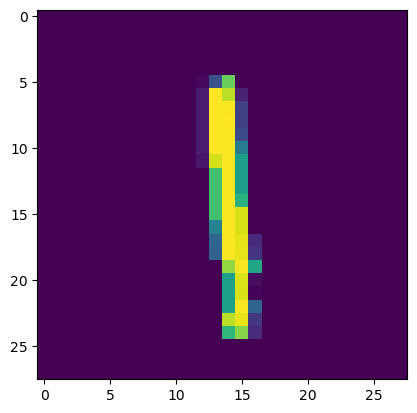

In [4]:
plt.imshow(x_train[8])

In [5]:
# converting into vector
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test= x_test.reshape(x_test.shape[0], 28*28)

# rescale 
x_train.max()
x_train = x_train/255
x_tes  = x_test/255
x_train.shape

(60000, 784)

In [6]:
input_layer = Input(shape=(x_train.shape[1]))
bottleneck = Dense(32 , activation = 'relu')(input_layer)
output_layer = Dense(x_train.shape[1] , activation = 'sigmoid')(bottleneck)

auto_encoder = Model(input_layer , output_layer)

auto_encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50992 (199.19 KB)
Trainable params: 50992 (199.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
#separate the encoder from the model
encoder = Model(input_layer , bottleneck)
encoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
Total params: 25120 (98.12 KB)
Trainable params: 25120 (98.12 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
#separate the decoder from the model
decoder = Model(bottleneck, output_layer)
decoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 25872 (101.06 KB)
Trainable params: 25872 (101.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
auto_encoder.compile(loss = 'mse' , optimizer = 'adam')
history = auto_encoder.fit(x_train , x_train , epochs = 100,batch_size = 64)

Epoch 1/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0416
Epoch 2/100
938/938 [==============================] - 2s 2ms/step - loss: 0.0181
Epoch 3/100
938/938 [==============================] - 2s 2ms/step - loss: 0.0131
Epoch 4/100
938/938 [==============================] - 2s 2ms/step - loss: 0.0114
Epoch 5/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0109
Epoch 6/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0106
Epoch 7/100
938/938 [==============================] - 2s 3ms/step - loss: 0.0105
Epoch 8/100
938/938 [==============================] - 2s 2ms/step - loss: 0.0104
Epoch 9/100
938/938 [==============================] - 2s 2ms/step - loss: 0.0104
Epoch 10/100
938/938 [==============================] - 2s 2ms/step - loss: 0.0103
Epoch 11/100
938/938 [==============================] - 2s 3ms/step - loss: 0.0103
Epoch 12/100
938/938 [==============================] - 3s 3ms/step - loss: 0.0102
Epoch 13/100


938/938 [==============================] - 2s 2ms/step - loss: 0.0097
Epoch 100/100
938/938 [==============================] - 2s 2ms/step - loss: 0.0097


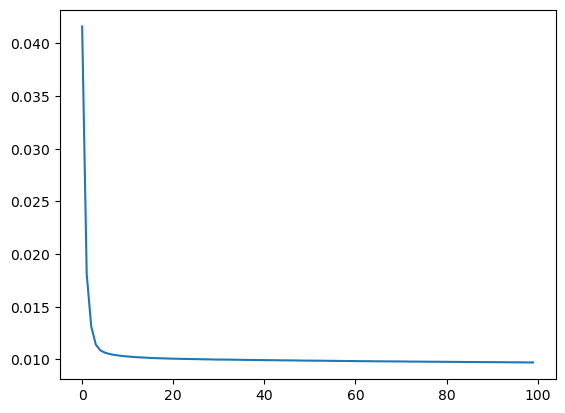

In [10]:
plt.plot(history.history['loss'])

In [11]:
# now we should applying encoder on testing data then passing it to the decoder
new_data = encoder.predict(x_test , batch_size = 512)
print(new_data.shape)

output_data = decoder.predict(new_data, batch_size = 512)
output_data.shape

20/20 [==============================] - 0s 2ms/step
(10000, 32)
20/20 [==============================] - 0s 2ms/step


(10000, 784)

(10000, 28, 28)


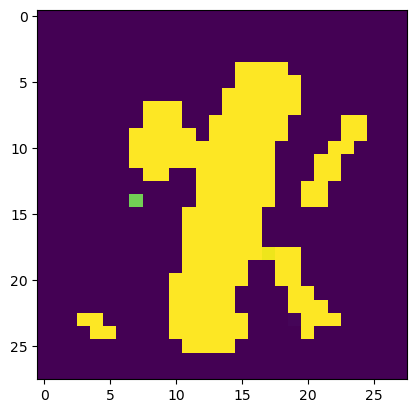

In [12]:
# reshaping the data to visualize it 
output_data = output_data.reshape(output_data.shape[0] , 28, 28)
print(output_data.shape)
# showing the image
plt.imshow(output_data[5] )

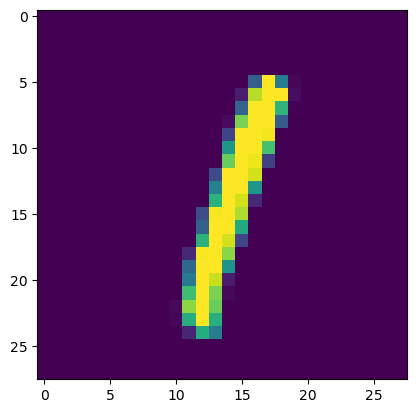

In [13]:
x_test = x_test.reshape(10000,28,28)
plt.imshow(x_test[5])